In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
data.shape

(891, 12)

In [46]:
data.isna().sum() # cabin is irrelevent, so for age -> median, and for embarked -> most frequent.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


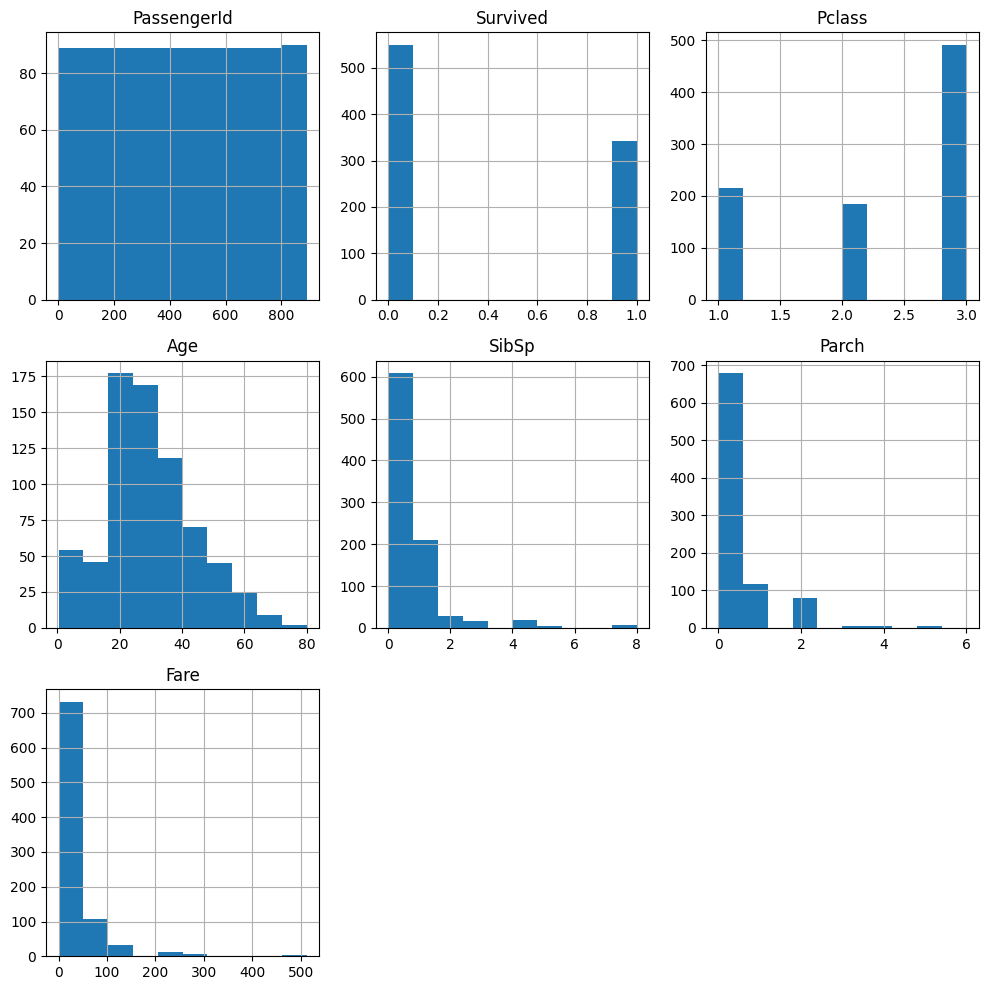

In [47]:
fig, axes = plt.subplots(figsize = (10, 10))
data.hist(bins=10, ax=axes)

plt.tight_layout()
plt.show() # there are some outliers, in fare, sibsp, and parch

<Axes: xlabel='Sex'>

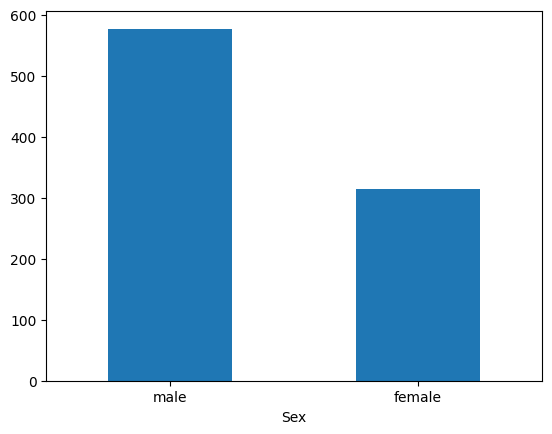

In [48]:
data['Sex'].value_counts().plot.bar(rot=0) # males are almost double of that of females.

<Axes: xlabel='Embarked'>

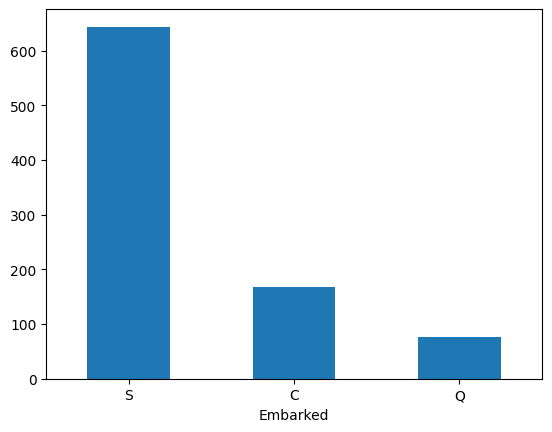

In [49]:
data['Embarked'].value_counts().plot.bar(rot=0) # S is most common.

In [50]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
Y = data['Survived']

X = data.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])

total_fam = []

for i in range(data.shape[0]):
  total_fam.append(data['SibSp'][i] + data['Parch'][i])


X['Total_Fam'] = total_fam # gives one more column to increase parameters.

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Fam
0,3,male,22.0,1,0,7.2500,S,1
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [53]:
from warnings import filterwarnings
filterwarnings("ignore")

# encoding manually

for i in range(data.shape[0]):

  element = data['Sex'][i]

  if element == 'male':
    element = 1
  else:
    element = 0

  X['Sex'][i] = element

for i in range(data.shape[0]):

   element = data['Embarked'][i]

   if element == 'S':
    element = 2

   elif element == 'C':
    element = 1

   else:
    element = 0

   X['Embarked'][i] = element


X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Fam
0,3,1,22.0,1,0,7.2500,2,1
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,2,0
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [34]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X = scaler.fit_transform(X)
# X # scaling did not make any difference.

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.50244517,
         0.56883712,  0.05915988],
       [-1.56610693, -1.35557354,  0.66386103, ...,  0.78684529,
        -1.00518113,  0.05915988],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.48885426,
         0.56883712, -0.56097483],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ..., -0.17626324,
         0.56883712,  1.29942929],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.04438104,
        -1.00518113, -0.56097483],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.49237783,
        -2.57919938, -0.56097483]])

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1)

LR.fit(X_train, Y_train)
RF.fit(X_train, Y_train)

Y_LR_Pred = LR.predict(X_test)
Y_RF_Pred = RF.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(accuracy_score(Y_test, Y_LR_Pred))
print(accuracy_score(Y_test, Y_RF_Pred))

# How many correctly predicted

0.8044692737430168
0.770949720670391


In [60]:
Y_LR_Pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [61]:
Y_RF_Pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0])

In [55]:
print(precision_score(Y_test, Y_LR_Pred))
print(precision_score(Y_test, Y_RF_Pred))

# How many true are actually true

0.803030303030303
0.925


In [56]:
print(recall_score(Y_test, Y_LR_Pred, pos_label=1))
print(recall_score(Y_test, Y_RF_Pred, pos_label=1))

# How many of actual true were predicted to be true

0.7066666666666667
0.49333333333333335


In [57]:
print(f1_score(Y_test, Y_LR_Pred))
print(f1_score(Y_test, Y_RF_Pred))

# Harmonic mean of P and R, more f1 means model is more balanced.

0.75177304964539
0.6434782608695652


<Axes: >

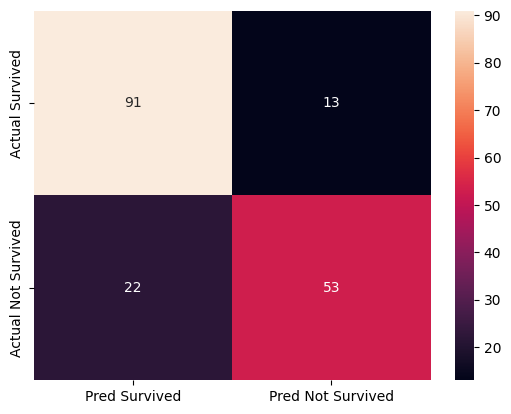

In [58]:
import seaborn as sns

sns.heatmap(confusion_matrix(Y_test, Y_LR_Pred), annot=True, xticklabels=['Pred Survived', 'Pred Not Survived'], yticklabels=['Actual Survived', 'Actual Not Survived'])

In [59]:
confusion_matrix(Y_test, Y_LR_Pred)

array([[91, 13],
       [22, 53]])

In [41]:
from sklearn.metrics import classification_report

classification_report(Y_test, Y_LR_Pred).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.81      0.88      0.84       104',
 '           1       0.80      0.71      0.75        75',
 '',
 '    accuracy                           0.80       179',
 '   macro avg       0.80      0.79      0.80       179',
 'weighted avg       0.80      0.80      0.80       179',
 '']

In [42]:
confusion_matrix(Y_test, Y_RF_Pred)

array([[101,   3],
       [ 38,  37]])

In [ ]:
# as LR is better at predicting survived, LR should be used.

In [78]:
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
test.shape

(418, 11)

In [80]:
test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [81]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


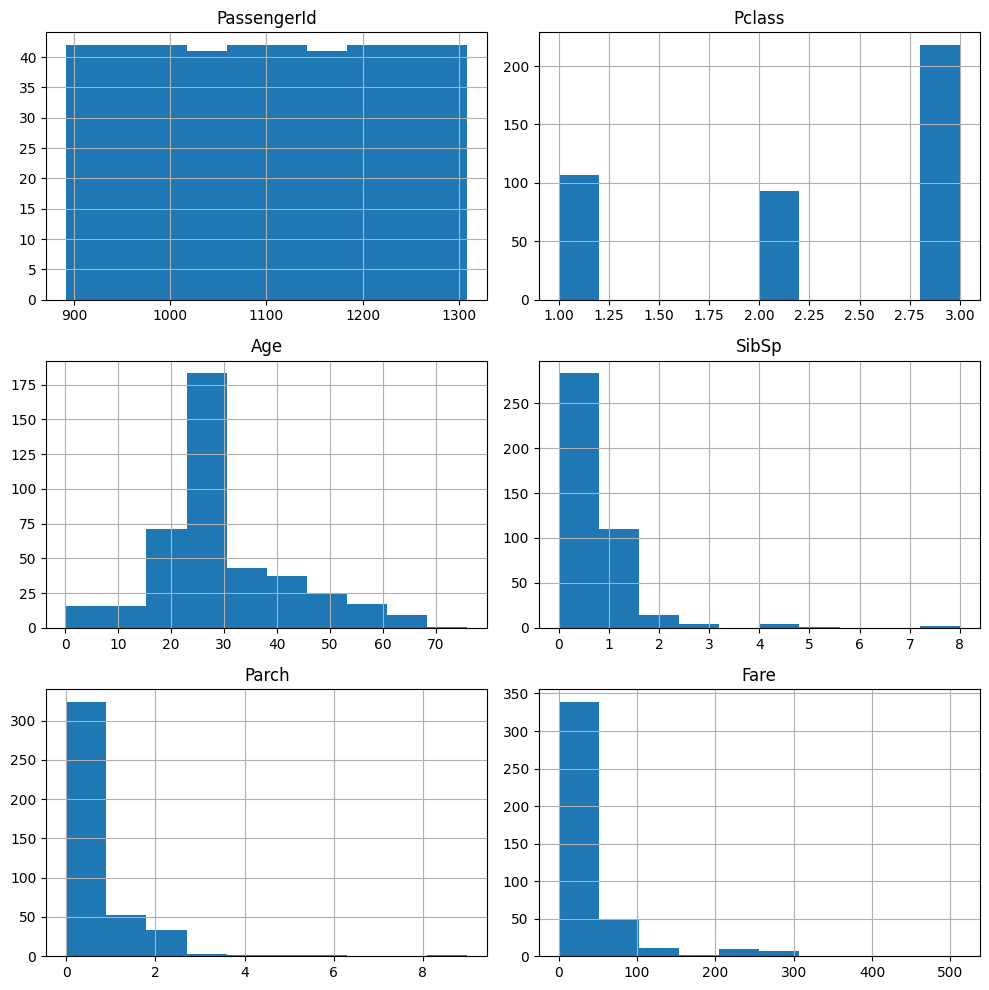

In [82]:
fig, axes = plt.subplots(figsize = (10, 10))
test.hist(bins=10, ax=axes)

plt.tight_layout()
plt.show() # more or less the same as train.csv

<Axes: xlabel='Sex'>

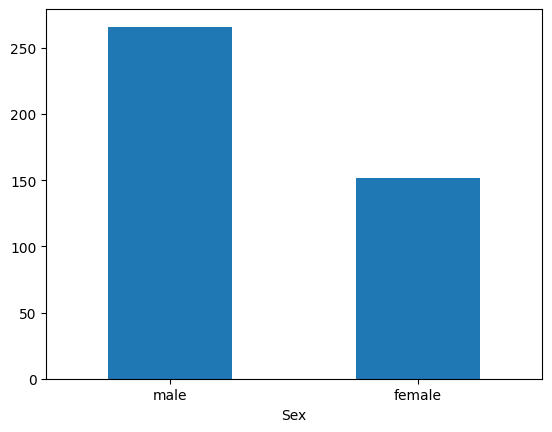

In [83]:
test['Sex'].value_counts().plot.bar(rot=0) # slightly more balanced than train

<Axes: xlabel='Embarked'>

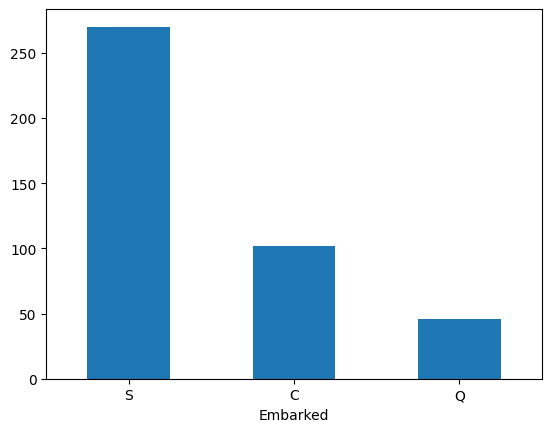

In [84]:
test['Embarked'].value_counts().plot.bar(rot=0)

In [85]:
X_TEST = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

# encoding manually

for i in range(test.shape[0]):

  element = test['Sex'][i]

  if element == 'male':
    element = 1
  else:
    element = 0

  X_TEST['Sex'][i] = element



for i in range(test.shape[0]):

   element = test['Embarked'][i]

   if element == 'S':
    element = 2

   elif element == 'C':
    element = 1

   else:
    element = 0

   X_TEST['Embarked'][i] = element


X_TEST.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [87]:
fam = []

for i in range(X_TEST.shape[0]):

  fam.append(X_TEST['SibSp'][i] + X_TEST['Parch'][i])

X_TEST['Total_Fam'] = fam

X_TEST.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Fam
0,3,1,34.5,0,0,7.8292,0,0
1,3,0,47.0,1,0,7.0000,2,1
2,2,1,62.0,0,0,9.6875,0,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,2


In [88]:
predicted_finally = LR.predict(X_TEST)
predicted_finally

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
predicted_finally.shape

(418,)

In [90]:
final_ans_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predicted_finally})

final_ans_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
final_ans_df.to_csv('/content/ans_initial.csv', index=False)